# 建模过程
1. 统计分析
2. 预处理（hr_preprocessing）
3. 建模（hr_modeling, hr_modeling_nn）
4. 评估
## 分类方法
- KNN
- SVM
- NaiveBayes
- LogisticRegression
- DecisionTree
- RandomForest
- AdaBoost
- GradientBoost
## 回归方法
- LinearRegression
- Ridge
- Lasso
## 降维方法
- LDA(LinearDiscriminantAnalysis)
- PCA
## 评估指标
- 混淆矩阵
- accuracy, recall, f1
- MSE, MAE, r2
- AUC
## 神经网络

In [7]:
import numpy as np
import pandas as pd

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder, Normalizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, r2_score 
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso

In [12]:
d = dict([("low",0),("medium",1),("high",2)])
def map_salary(s):
    return d.get(s, 0)

def hr_preprocessing(sl=False, le=False, npr=False, amh=False, tsc=False, wa=False, pl5=False, dp=False, slr=False, lower_d=False, ld_n=1):
    df = pd.read_csv('/mnt/qufang3/data/HR.csv')
    df = df.dropna(subset=["satisfaction_level","last_evaluation"])
    df = df[df["satisfaction_level"]<=1][df["salary"]!="nme"]
    label = df["left"]
    df = df.drop("left", axis=1)
    
    scaler_lst = [sl,le,npr,amh,tsc,wa,pl5]
    column_lst = ["satisfaction_level","last_evaluation","number_project","average_monthly_hours","time_spend_company","Work_accident","promotion_last_5years"]
    for i in range(len(scaler_lst)):
        if not scaler_lst[i]:
            df[column_lst[i]] = MinMaxScaler().fit_transform(df[column_lst[i]].values.reshape(-1,1)).reshape(1,-1)[0]
        else:
            df[column_lst[i]] = StandardScaler().fit_transform(df[column_lst[i]].values.reshape(-1,1)).reshape(1,-1)[0]
    scaler_lst = [slr,dp]
    column_lst = ["salary","department"]
    for i in range(len(scaler_lst)):
        if not scaler_lst[i]:
            if column_lst[i] == "salary":
                df[column_lst[i]] = [map_salary(s) for s in df["salary"].values]
            else:
                df[column_lst[i]] = LabelEncoder().fit_transform(df[column_lst[i]])
            df[column_lst[i]] = MinMaxScaler().fit_transform(df[column_lst[i]].values.reshape(-1,1)).reshape(1,-1)[0]
        else:
            df = pd.get_dummies(df, columns=[column_lst[i]])
    if lower_d:
        return PCA(n_components=ld_n).fit_transform(df.values), label
    return df, label

def hr_modeling(features, label):
    f_v = features.values
    f_names = features.columns.values
    l_v = label.values
    X_tt, X_validation, Y_tt, Y_validation = train_test_split(f_v, l_v, test_size=0.2)
    X_train, X_test, Y_train, Y_test = train_test_split(X_tt, Y_tt, test_size=0.25)
    
    models = []
    models.append(("KNN", KNeighborsClassifier(n_neighbors=3)))
    models.append(("GaussianNB", GaussianNB()))
    models.append(("BernoulliNB", BernoulliNB()))
    models.append(("DecisionTreeGini", DecisionTreeClassifier()))
    models.append(("DecisionTreeEntropy", DecisionTreeClassifier(criterion="entropy")))
    models.append(("SVM Classifier", SVC(C=1000)))
    models.append(("OriginalRandomForest", RandomForestClassifier()))
    models.append(("RandomForest", RandomForestClassifier(n_estimators=11, max_features=None)))
    models.append(("Adaboost", AdaBoostClassifier(n_estimators=100)))
    models.append(("LogisticRegression", LogisticRegression(C=1000, tol=1e-10, solver="sag", max_iter=10000)))
    models.append(("GBDT", GradientBoostingClassifier(max_depth=6, n_estimators=100)))
    
    for clf_name, clf in models:
        clf.fit(X_train, Y_train)
        xy_lst = [(X_train, Y_train), (X_validation, Y_validation), (X_test, Y_test)]
        for i in range(len(xy_lst)):
            X_part = xy_lst[i][0]
            Y_part = xy_lst[i][1]
            Y_pred = clf.predict(X_part)
            print(i)
            print(clf_name, "-ACC", accuracy_score(Y_part, Y_pred))
            print(clf_name, "-REC", recall_score(Y_part, Y_pred))
            print(clf_name, "-F1", f1_score(Y_part, Y_pred))

def regr_test(features, label):
    print("X", features)
    print("Y", label)
    
    regr = Ridge(alpha=1)
    regr.fit(features.values, label.values)
    Y_pred = regr.predict(features.values)
    print("Coef: ", regr.coef_)
    print("MSE: ", mean_squared_error(label.values, Y_pred))
    print("MAE: ", mean_absolute_error(label.values, Y_pred))
    print("R2: ", r2_score(label.values, Y_pred))

In [10]:
features, label = hr_preprocessing()

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dty

In [13]:
hr_modeling(features, label)

0
KNN -ACC 0.9744416046227359
KNN -REC 0.9632044713553796
KNN -F1 0.9473202015574897
1
KNN -ACC 0.9536666666666667
KNN -REC 0.9241573033707865
KNN -F1 0.90446735395189
2
KNN -ACC 0.9526666666666667
KNN -REC 0.9185393258426966
KNN -F1 0.9020689655172414
0
GaussianNB -ACC 0.796310701189021
GaussianNB -REC 0.7233348858872846
GaussianNB -F1 0.6288722413444018
1
GaussianNB -ACC 0.8043333333333333
GaussianNB -REC 0.7247191011235955
GaussianNB -F1 0.637430512662137
2
GaussianNB -ACC 0.7943333333333333
GaussianNB -REC 0.6896067415730337
GaussianNB -F1 0.6141338336460288
0
BernoulliNB -ACC 0.8403155906211801
BernoulliNB -REC 0.4750815090824406
BernoulliNB -F1 0.5867126833477135
1
BernoulliNB -ACC 0.846
BernoulliNB -REC 0.46207865168539325
BernoulliNB -F1 0.5875
2
BernoulliNB -ACC 0.8413333333333334
BernoulliNB -REC 0.4550561797752809
BernoulliNB -F1 0.5765124555160143
0
DecisionTreeGini -ACC 1.0
DecisionTreeGini -REC 1.0
DecisionTreeGini -F1 1.0
1
DecisionTreeGini -ACC 0.9723333333333334
Decisi

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0
SVM Classifier -ACC 0.9622180242249139
SVM Classifier -REC 0.9175593851886353
SVM Classifier -F1 0.9205607476635513
1
SVM Classifier -ACC 0.9653333333333334
SVM Classifier -REC 0.9157303370786517
SVM Classifier -F1 0.9261363636363636
2
SVM Classifier -ACC 0.956
SVM Classifier -REC 0.9030898876404494
SVM Classifier -F1 0.9069111424541608
0
OriginalRandomForest -ACC 0.9973330370041116
OriginalRandomForest -REC 0.9897531439217513
OriginalRandomForest -F1 0.9943846513804399
1
OriginalRandomForest -ACC 0.9856666666666667
OriginalRandomForest -REC 0.949438202247191
OriginalRandomForest -F1 0.9691756272401434
2
OriginalRandomForest -ACC 0.9856666666666667
OriginalRandomForest -REC 0.949438202247191
OriginalRandomForest -F1 0.9691756272401434


/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0
RandomForest -ACC 0.9981109012112457
RandomForest -REC 0.9930135072193759
RandomForest -F1 0.9960289651950479
1
RandomForest -ACC 0.986
RandomForest -REC 0.9550561797752809
RandomForest -F1 0.9700427960057061
2
RandomForest -ACC 0.9866666666666667
RandomForest -REC 0.9592696629213483
RandomForest -F1 0.9715504978662873
0
Adaboost -ACC 0.9604400488943216
Adaboost -REC 0.9105728924080112
Adaboost -F1 0.9165494608532584
1
Adaboost -ACC 0.9573333333333334
Adaboost -REC 0.9073033707865169
Adaboost -F1 0.9098591549295775
2
Adaboost -ACC 0.9626666666666667
Adaboost -REC 0.9058988764044944
Adaboost -F1 0.920114122681883
0
LogisticRegression -ACC 0.7941993554839427
LogisticRegression -REC 0.3614345598509548
LogisticRegression -F1 0.45593419506462984
1
LogisticRegression -ACC 0.7976666666666666
LogisticRegression -REC 0.3946629213483146
LogisticRegression -F1 0.48075278015397777
2
LogisticRegression -ACC 0.7903333333333333
LogisticRegression -REC 0.3539325842696629
LogisticRegression -F1 0.444

In [15]:
regr_test(features[["number_project","average_monthly_hours"]], features["last_evaluation"])

X        number_project  average_monthly_hours
0                 0.0               0.285047
1                 0.6               0.775701
2                 1.0               0.822430
3                 0.6               0.593458
4                 0.0               0.294393
...               ...                    ...
14994             0.0               0.257009
14995             0.0               0.299065
14996             0.0               0.219626
14997             0.8               0.859813
14998             0.0               0.289720

[14999 rows x 2 columns]
Y 0        0.265625
1        0.781250
2        0.812500
3        0.796875
4        0.250000
           ...   
14994    0.328125
14995    0.187500
14996    0.265625
14997    0.937500
14998    0.250000
Name: last_evaluation, Length: 14999, dtype: float64
Coef:  [0.27247571 0.268934  ]
MSE:  0.059538014493206
MAE:  0.20435511892083338
R2:  0.16759924962620698


In [16]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [26]:
def hr_modeling_nn(features, label):
    f_v = features.values
    f_names = features.columns.values
    l_v = label.values
    X_tt, X_validation, Y_tt, Y_validation = train_test_split(f_v, l_v, test_size=0.2)
    X_train, X_test, Y_train, Y_test = train_test_split(X_tt, Y_tt, test_size=0.25)
    
    mdl = Sequential()
    mdl.add(Dense(50, input_dim=len(f_v[0])))
    mdl.add(Activation("sigmoid"))
    mdl.add(Dense(2))
    mdl.add(Activation("softmax"))
    sgd = SGD(lr=0.1)
    mdl.compile(loss="mean_squared_error", optimizer="adam")
    mdl.fit(X_train, np.array([[0,1] if i == 1 else [1,0] for i in Y_train]), nb_epoch=1000, batch_size=8999)
    
    xy_lst = [(X_train, Y_train), (X_validation, Y_validation), (X_test, Y_test)]
    f = plt.figure()
    for i in range(len(xy_lst)):
        X_part = xy_lst[i][0]
        Y_part = xy_lst[i][1]
        Y_pred = mdl.predict(X_part)
        print(Y_pred)
        Y_pred = np.array(Y_pred[:,1]).reshape((1,-1))[0]
#         print(i)
#         print("NN","-ACC: ", accuracy_score(Y_part, Y_pred))
#         print("NN","-REC: ", recall_score(Y_part, Y_pred))
#         print("NN","-F1: ", f1_score(Y_part, Y_pred))
        f.add_subplot(1,3,i+1)
        fpr, tpr, threshold = roc_curve(Y_part, Y_pred)
        plt.plot(fpr, tpr)
        print("NN","-AUC: ", auc(fpr, tpr))
        print("NN","AUC_Score: ", roc_auc_score(Y_part, Y_pred))
    plt.show()
    return 

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Epoch 1/1000
8999/8999 [==============================] - 0s 29us/step - loss: 0.5379
Epoch 2/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.5274
Epoch 3/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.5166
Epoch 4/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.5056
Epoch 5/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.4942
Epoch 6/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.4826
Epoch 7/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.4708
Epoch 8/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.4588
Epoch 9/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.4466
Epoch 10/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.4343
Epoch 11/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.4218
Epoch 12/1000
8999/8999 [==============================] - 0s 

Epoch 97/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1786
Epoch 98/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1785
Epoch 99/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1785
Epoch 100/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1784
Epoch 101/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1784
Epoch 102/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1784
Epoch 103/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1783
Epoch 104/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1783
Epoch 105/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1783
Epoch 106/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1782
Epoch 107/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1782
Epoch 108/1000
8999/8999 [====================

Epoch 192/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1750
Epoch 193/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1749
Epoch 194/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1749
Epoch 195/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1749
Epoch 196/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1748
Epoch 197/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1748
Epoch 198/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1747
Epoch 199/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1747
Epoch 200/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1746
Epoch 201/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1746
Epoch 202/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1746
Epoch 203/1000
8999/8999 [=================

8999/8999 [==============================] - 0s 1us/step - loss: 0.1710
Epoch 287/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1709
Epoch 288/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1709
Epoch 289/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1708
Epoch 290/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1708
Epoch 291/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1708
Epoch 292/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1707
Epoch 293/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1707
Epoch 294/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1706
Epoch 295/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1706
Epoch 296/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1705
Epoch 297/1000
8999/8999 [==============================] 

Epoch 381/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1667
Epoch 382/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1667
Epoch 383/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1666
Epoch 384/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1666
Epoch 385/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1666
Epoch 386/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1665
Epoch 387/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1665
Epoch 388/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1664
Epoch 389/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1664
Epoch 390/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1663
Epoch 391/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1663
Epoch 392/1000
8999/8999 [=================

8999/8999 [==============================] - 0s 1us/step - loss: 0.1626
Epoch 476/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1625
Epoch 477/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1625
Epoch 478/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1624
Epoch 479/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1624
Epoch 480/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1624
Epoch 481/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1623
Epoch 482/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1623
Epoch 483/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1622
Epoch 484/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1622
Epoch 485/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1621
Epoch 486/1000
8999/8999 [==============================] 

Epoch 570/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1586
Epoch 571/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1586
Epoch 572/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1586
Epoch 573/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1585
Epoch 574/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1585
Epoch 575/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1585
Epoch 576/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1584
Epoch 577/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1584
Epoch 578/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1583
Epoch 579/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1583
Epoch 580/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1583
Epoch 581/1000
8999/8999 [=================

8999/8999 [==============================] - 0s 1us/step - loss: 0.1552
Epoch 665/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1552
Epoch 666/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1552
Epoch 667/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1551
Epoch 668/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1551
Epoch 669/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1551
Epoch 670/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1550
Epoch 671/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1550
Epoch 672/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1550
Epoch 673/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1549
Epoch 674/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1549
Epoch 675/1000
8999/8999 [==============================] 

Epoch 759/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1523
Epoch 760/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1523
Epoch 761/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1523
Epoch 762/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1523
Epoch 763/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1522
Epoch 764/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1522
Epoch 765/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1522
Epoch 766/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1521
Epoch 767/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1521
Epoch 768/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1521
Epoch 769/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1521
Epoch 770/1000
8999/8999 [=================

8999/8999 [==============================] - 0s 1us/step - loss: 0.1500
Epoch 854/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1500
Epoch 855/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1499
Epoch 856/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1499
Epoch 857/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1499
Epoch 858/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1499
Epoch 859/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1499
Epoch 860/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1498
Epoch 861/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1498
Epoch 862/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1498
Epoch 863/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1498
Epoch 864/1000
8999/8999 [==============================] 

Epoch 948/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1480
Epoch 949/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1480
Epoch 950/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1480
Epoch 951/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1480
Epoch 952/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1480
Epoch 953/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1479
Epoch 954/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1479
Epoch 955/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1479
Epoch 956/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1479
Epoch 957/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1479
Epoch 958/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1478
Epoch 959/1000
8999/8999 [=================

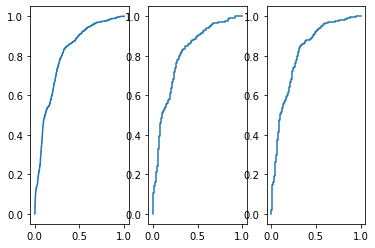

In [27]:
hr_modeling_nn(features, label)